<a href="https://colab.research.google.com/github/ignyz/Numerical-methods-and-algorithms/blob/main/L4_1_1_Torricelli_Niutono_dinamikos_desniai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RK$$$$$$$$$$$


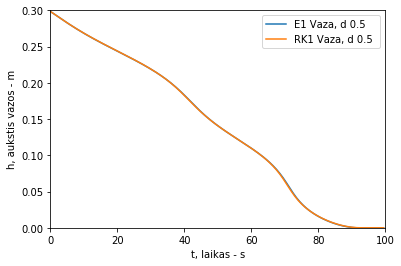

In [ ]:
import numpy as np
from numpy import linalg as LA
import numpy
import math
import matplotlib.pyplot as plt
#import time
#import sympy as sym
from numpy import *
from matplotlib.pyplot import *


def R(h1):
    rf = 0.
    rf = (h1/2) + (1/40) * np.cos((50*np.pi*h1)/3)+0.09
    return rf


steps = np.array([0.5])


for step in steps:
    rh = 0.01  # dugno ertmes spindulys
    c = 0.6  # proporcingumo daugiklis
    tmax = 100  # galutinis laiko momentas
    rc = 0.075  # cilindro spindulys
    g = 9.8
    x = 0.  # laikas
    N = int(tmax/step)
    x1 = zeros(N, dtype=float)
    y1 = zeros(N, dtype=float)
    h0 = 0.3  # pradinio skyscio aukstis
    for i in range(N):
        if h0 >= 0:
            x = i * step
            yh = h0 + step * \
                (-1*((c*(rh**2)) / ((R(h0))**2) * math.sqrt(2*g*h0)))
            h0 = yh
            # pridedam taskus i grafika
        x1[i] = x
        y1[i] = h0
        if h0 < 0:
            h0 = 0
            #print("Išbėgo iš vazos -> ", x, " su žingsniu", step)
            # break

    h01 = 0.3
    x2 = zeros(N, dtype=float)
    y2 = zeros(N, dtype=float)
    for i in range(N):
        if h01 >= 0:
            x = i * step
            s1 = math.sqrt(2*g*h01)
            yhh = h01 + step*(-1*(c*(rh**2))/(rc**2)) * s1
            h01 = yhh
            # pridedam taskus i grafika
        x2[i] = x
        y2[i] = yhh
        if h01 < 0:
            h01 = 0
            #print("Išbėgo iš cilindro -> ", x, " su žingsniu", step)
            # break
    #plot(x1, y1, 'r-', label='E Vaza, d {i}  '.format(i=step))
    #plot(x2, y2, 'b-', label='E  Cilindras, d {i}  '.format(i=step))

    plot(x1, y1, label='E1 Vaza, d {i} '.format(i=step))
    #plot(x2, y2, label='E2 Cilindras, d {i} '.format(i=step))

plt.legend(loc='best')
xlabel('t, laikas - s')
ylabel('h, aukstis vazos - m')
plt.axis([0, 100, 0, 0.3])
# plt.show()

##############################################################
print("RK$$$$$$$$$$$")
for step in steps:
    rh = 0.01  # dugno ertmes spindulys
    c = 0.6  # proporcingumo daugiklis
    tmax = 100  # galutinis laiko momentas
    rc = 0.075  # cilindro spindulys
    g = 9.8
    x = 0.  # laikas
    N = int(tmax/step)
    xb1 = zeros(N, dtype=float)
    yb1 = zeros(N, dtype=float)
    h0 = 0.3  # pradinio skyscio aukstis
    for i in range(N):
        h_3 = 0
        if h0 >= 0:
            x = i * step

            dy1 = (-1*((c*(rh**2))/((R(h0))**2) * math.sqrt(2*g*h0)))
            h_1 = h0 + (step/2) * dy1
            if h_1 >= 0:
                dy2 = (-1*((c*(rh**2))/((R(h_1))**2) * math.sqrt(2*g*h_1)))
            h_2 = h0 + (step / 2) * dy2
            if h_2 >= 0:
                dy3 = ((-1*((c*(rh**2))/((R(h_2))**2) * math.sqrt(2*g*h_2))))
            h_3 = h0 + step * dy3

            if h_3 > 0:
                a1 = (-1*((c*(rh**2))/((R(h_2))**2)) * math.sqrt(2*g*h_2))
                ax = math.sqrt(2*g*h_3)
                a2 = (-1*((c*(rh**2))/((R(h_3))**2)) * ax)
                hh = h0 + (step / 6) * (dy1 + 2 * dy2 + 2 * a1 + a2)
                h0 = hh
        if h_3 <= 0:
            h0 = 0
            #print("Išbėgo iš vazos -> ", x, " su žingsniu", step)
            # break
            # pridedam taskus i grafika
        xb1[i] = x
        yb1[i] = h0

    xb2 = zeros(N, dtype=float)
    yb2 = zeros(N, dtype=float)
    h0 = 0.3  # pradinio skyscio aukstis
    for i in range(N):
        if h0 >= 0:
            x = i * step
            dy1 = (-1*((c*(rh**2))/((rc)**2) * math.sqrt(2*g*h0)))

            h_1 = h0 + (step/2) * dy1
            if h_1 >= 0:
                dy2 = (-1*((c*(rh**2))/((rc)**2) * math.sqrt(2*g*h_1)))

            h_2 = h0 + (step / 2) * dy2
            if h_2 >= 0:
                dy3 = ((-1*((c*(rh**2))/((rc)**2) * math.sqrt(2*g*h_2))))
            h_3 = h0 + step * dy3

            if h_3 > 0:
                a1 = (-1*((c*(rh**2))/((rc)**2)) * math.sqrt(2*g*h_2))
                a2 = (-1*((c*(rh**2))/((rc)**2)) * math.sqrt(2*g*h_3))

                hh = h0 + (step / 6) * (dy1 + 2 * dy2 + 2 * a1 + a2)
                h0 = hh
        if h_3 <= 0:
            h0 = 0
            #print("Išbėgo iš cilindro -> ", x, " su žingsniu", step)
            # break
            # pridedam taskus i grafika
        xb2[i] = x
        yb2[i] = h0
    plot(xb1, yb1, label='RK1 Vaza, d {i} '.format(i=step))
    #plot(xb2, yb2, label='RK2 Cilindras, d {i} '.format(i=step))
    #plot(xb1, yb1, 'k-', label='RK1 Vaza, d {i}'.format(i=step))
    #plot(xb2, yb2, 'y-', label='RK2 Cilindras, d {i}'.format(i=step))


plt.legend(loc='best')
xlabel('t, laikas - s')
ylabel('h, aukstis vazos - m')
plt.axis([0, 100, 0, 0.3])
plt.show()


0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.5
28.0
28.5
29.0
29.5
30.0
30.5
31.0
31.5
32.0
32.5
33.0
33.5
34.0
34.5
35.0
35.5
36.0
36.5
37.0
37.5
38.0
38.5
39.0
39.5
40.0
40.5
41.0
41.5
42.0
42.5
43.0
43.5
44.0
44.5
45.0
45.5
46.0
46.5
47.0
47.5
48.0
48.5
49.0
49.5
50.0
50.5
51.0
51.5
52.0
52.5
53.0
53.5
54.0
54.5
55.0
55.5
56.0
56.5
57.0
57.5
58.0
58.5
59.0
59.5
60.0
60.5
61.0
61.5
62.0
62.5
63.0
63.5
64.0
64.5
65.0
65.5
66.0
66.5
67.0
67.5
68.0
68.5
69.0
69.5
70.0
70.5
71.0
71.5
72.0
72.5
73.0
73.5
74.0
74.5
75.0
75.5
76.0
76.5
77.0
77.5
78.0
78.5
79.0
79.5
80.0
80.5
81.0
81.5
82.0
82.5
83.0
83.5
84.0
84.5
85.0
85.5
86.0
86.5
87.0
87.5
88.0
88.5
89.0
89.5
90.0
90.5
91.0
91.5
92.0
92.5
93.0
93.5
94.0
94.5
95.0
95.5
96.0
96.5
97.0
97.5
98.0
98.5
99.0
99.5
RK$$$$$$$$$$$
Išbėgo

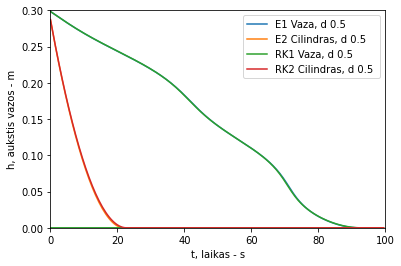

In [ ]:
import numpy as np
from numpy import linalg as LA
import numpy
import math
import matplotlib.pyplot as plt
#import time
#import sympy as sym
from numpy import *
from matplotlib.pyplot import *


def R(h1):
    rf = 0.
    rf = (h1/2) + (1/40) * np.cos((50*np.pi*h1)/3)+0.09
    return rf


steps = np.array([0.5])


for step in steps:
    rh = 0.01  # dugno ertmes spindulys
    c = 0.6  # proporcingumo daugiklis
    tmax = 100  # galutinis laiko momentas
    rc = 0.075  # cilindro spindulys
    g = 9.8
    x = 0.  # laikas
    N = int(tmax/step)
    x1 = zeros(N, dtype=float)
    y1 = zeros(N, dtype=float)
    h0 = 0.3  # pradinio skyscio aukstis
    for i in range(N):
        if h0 >= 0:
            x = i * step
            print(x)
            yh = h0 + step * \
                (-1*((c*(rh**2)) / ((R(h0))**2) * math.sqrt(2*g*h0)))
            h0 = yh
            # pridedam taskus i grafika
        x1[i] = x
        y1[i] = h0
        if h0 < 0:
            h0 = 0
            #print("Išbėgo iš vazos -> ", x, " su žingsniu", step)
            # break

    h01 = 0.3
    x2 = zeros(N, dtype=float)
    y2 = zeros(N, dtype=float)
    for i in range(N):
        if h01 >= 0:
            x = i * step
            s1 = math.sqrt(2*g*h01)
            yhh = h01 + step*(-1*(c*(rh**2))/(rc**2)) * s1
            h01 = yhh
            # pridedam taskus i grafika
        x2[i] = x
        y2[i] = yhh
        if h01 < 0:
            h01 = 0
            #print("Išbėgo iš cilindro -> ", x, " su žingsniu", step)
            # break
    #plot(x1, y1, 'r-', label='E Vaza, d {i}  '.format(i=step))
    #plot(x2, y2, 'b-', label='E  Cilindras, d {i}  '.format(i=step))

    plot(x1, y1, label='E1 Vaza, d {i} '.format(i=step))
    plot(x2, y2, label='E2 Cilindras, d {i} '.format(i=step))

plt.legend(loc='best')
xlabel('t, laikas - s')
ylabel('h, aukstis vazos - m')
plt.axis([0, 100, 0, 0.3])
# plt.show()

##############################################################
print("RK$$$$$$$$$$$")
for step in steps:
    rh = 0.01  # dugno ertmes spindulys
    c = 0.6  # proporcingumo daugiklis
    tmax = 100  # galutinis laiko momentas
    rc = 0.075  # cilindro spindulys
    g = 9.8
    x = 0.  # laikas
    N = int(tmax/step)
    xb1 = zeros(N, dtype=float)
    yb1 = zeros(N, dtype=float)
    h0 = 0.3  # pradinio skyscio aukstis
    for i in range(N):
        h_3 = 0
        if h0 >= 0:
            x = i * step

            dy1 = (-1*((c*(rh**2))/((R(h0))**2) * math.sqrt(2*g*h0)))
            h_1 = h0 + (step/2) * dy1
            if h_1 > 0:
                dy2 = (-1*((c*(rh**2))/((R(h_1))**2) * math.sqrt(2*g*h_1)))
            h_2 = h0 + (step / 2) * dy2
            if h_2 >=0:
                dy3 = ((-1*((c*(rh**2))/((R(h_2))**2) * math.sqrt(2*g*h_2))))
            h_3 = h0 + step * dy3

            if h_3 >= 0:
                a1 = (-1*((c*(rh**2))/((R(h_2))**2)) * math.sqrt(2*g*h_2))
                ax = math.sqrt(2*g*h_3)
                a2 = (-1*((c*(rh**2))/((R(h_3))**2)) * ax)
                hh = h0 + (step / 6) * (dy1 + 2 * dy2 + 2 * a1 + a2)
                h0 = hh
        if h_3 < 0:
            #h0 = 0
            print("Išbėgo iš vazos -> ", x, " su žingsniu", step)
            break
            # pridedam taskus i grafika
        xb1[i] = x
        yb1[i] = h0

    xb2 = zeros(N, dtype=float)
    yb2 = zeros(N, dtype=float)
    h0 = 0.3  # pradinio skyscio aukstis
    for i in range(N):
        if h0 >= 0:
            x = i * step
            dy1 = (-1*((c*(rh**2))/((rc)**2) * math.sqrt(2*g*h0)))

            h_1 = h0 + (step/2) * dy1
            if h_1 >= 0:
                dy2 = (-1*((c*(rh**2))/((rc)**2) * math.sqrt(2*g*h_1)))

            h_2 = h0 + (step / 2) * dy2
            if h_2 >= 0:
                dy3 = ((-1*((c*(rh**2))/((rc)**2) * math.sqrt(2*g*h_2))))
            h_3 = h0 + step * dy3

            if h_3 > 0:
                a1 = (-1*((c*(rh**2))/((rc)**2)) * math.sqrt(2*g*h_2))
                a2 = (-1*((c*(rh**2))/((rc)**2)) * math.sqrt(2*g*h_3))

                hh = h0 + (step / 6) * (dy1 + 2 * dy2 + 2 * a1 + a2)
                h0 = hh
        if h_3 < 0:
            h0 = 0
            #print("Išbėgo iš cilindro -> ", x, " su žingsniu", step)
            # break
            # pridedam taskus i grafika
        xb2[i] = x
        yb2[i] = h0
    plot(xb1, yb1, label='RK1 Vaza, d {i} '.format(i=step))
    plot(xb2, yb2, label='RK2 Cilindras, d {i} '.format(i=step))
    #plot(xb1, yb1, 'k-', label='RK1 Vaza, d {i}'.format(i=step))
    #plot(xb2, yb2, 'y-', label='RK2 Cilindras, d {i}'.format(i=step))


plt.legend(loc='best')
xlabel('t, laikas - s')
ylabel('h, aukstis vazos - m')
plt.axis([0, 100, 0, 0.3])
plt.show()

